# Overview

In [1]:
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from IPython.display import Video

In [3]:
# train folder
print(os.listdir("../Bundesliga/data/train"))

['1606b0e6_1.mp4', 'cfbe2e94_1.mp4', 'cfbe2e94_0.mp4', '1606b0e6_0.mp4', '407c5a9e_1.mp4', '9a97dae4_1.mp4', '3c993bd2_0.mp4', '3c993bd2_1.mp4', '4ffd5986_0.mp4', 'ecf251d4_0.mp4', '35bd9041_1.mp4', '35bd9041_0.mp4']


In [4]:
# test folder
print(os.listdir("../Bundesliga/data/test"))

['019d5b34_1.mp4', '019d5b34_0.mp4', '9a70c54e_0.mp4', '9a70c54e_1.mp4', 'e9d974aa_1.mp4', 'e9d974aa_0.mp4', 'ef4c2eb9_1.mp4', '5dc4fe12_0.mp4', '5dc4fe12_1.mp4', 'ef4c2eb9_0.mp4', 'fdf84965_1.mp4', 'e660601b_1.mp4', '9d3c239b_1.mp4', '4dae79a9_0.mp4', '4dae79a9_1.mp4', '9d3c239b_0.mp4', 'e660601b_0.mp4', 'fdf84965_0.mp4', '947e05ca_0.mp4', '947e05ca_1.mp4', '9f4df856_1.mp4', '9f4df856_0.mp4', 'ec9f4e2b_1.mp4', 'ec9f4e2b_0.mp4', '160606be_0.mp4', 'b2939d3c_0.mp4', 'b2939d3c_1.mp4', '160606be_1.mp4', '2f54ed1c_0.mp4', '0b1495d3_0.mp4', '0b1495d3_1.mp4', '2f54ed1c_1.mp4']


In [5]:
# games without annotations of events

print(os.listdir("../Bundesliga/data/clips"))

['121364_7.mp4', 'd82e7a_8.mp4', '0a2d9b_0.mp4', '573e61_6.mp4', '2e57b9_0.mp4', '744b27_3.mp4', '538438_8.mp4', '0bfacc_2.mp4', '798b45_5.mp4', '798b45_4.mp4', '0bfacc_3.mp4', '538438_9.mp4', '744b27_2.mp4', '2e57b9_1.mp4', '573e61_7.mp4', '0a2d9b_1.mp4', 'd82e7a_9.mp4', '121364_6.mp4', '121364_4.mp4', '0a2d9b_3.mp4', 'c01561_9.mp4', '573e61_5.mp4', '744b27_0.mp4', '2e57b9_3.mp4', '0bfacc_1.mp4', '798b45_6.mp4', '798b45_7.mp4', '0bfacc_0.mp4', '2e57b9_2.mp4', '744b27_1.mp4', '573e61_4.mp4', 'c01561_8.mp4', '0a2d9b_2.mp4', '121364_5.mp4', '121364_1.mp4', '42ba34_8.mp4', '0a2d9b_6.mp4', '744b27_5.mp4', '2e57b9_6.mp4', '573e61_0.mp4', '0bfacc_4.mp4', '798b45_3.mp4', '798b45_2.mp4', '0bfacc_5.mp4', '573e61_1.mp4', '2e57b9_7.mp4', '744b27_4.mp4', '0a2d9b_7.mp4', '42ba34_9.mp4', '121364_0.mp4', '121364_2.mp4', '0a2d9b_5.mp4', '2e57b9_5.mp4', '744b27_6.mp4', '573e61_3.mp4', '0bfacc_7.mp4', 'a9f16c_9.mp4', '798b45_0.mp4', 'a9f16c_8.mp4', '798b45_1.mp4', '0bfacc_6.mp4', '573e61_2.mp4', '744b27

In [6]:
df = pd.read_csv("../Bundesliga/data/train.csv")
df

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']
...,...,...,...,...
11213,ecf251d4_0,3056.587000,challenge,['opponent_dispossessed']
11214,ecf251d4_0,3058.072895,end,NaN
11215,ecf251d4_0,3068.280519,start,NaN
11216,ecf251d4_0,3069.547000,throwin,['pass']


<AxesSubplot:xlabel='count', ylabel='event'>

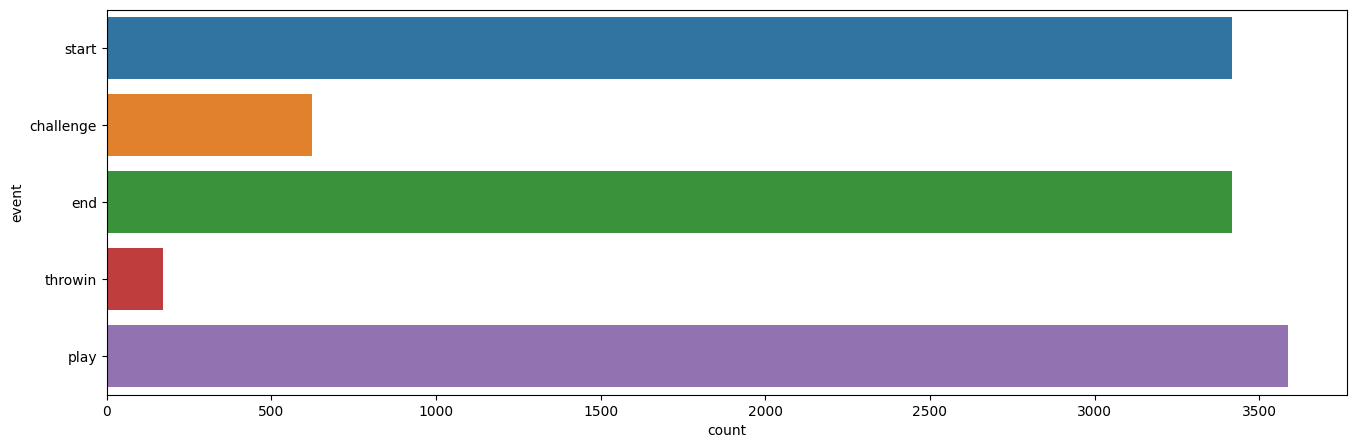

In [7]:
plt.figure(figsize=(16,5))
sns.countplot(y="event", data=df)

<AxesSubplot:xlabel='count', ylabel='event_attributes'>

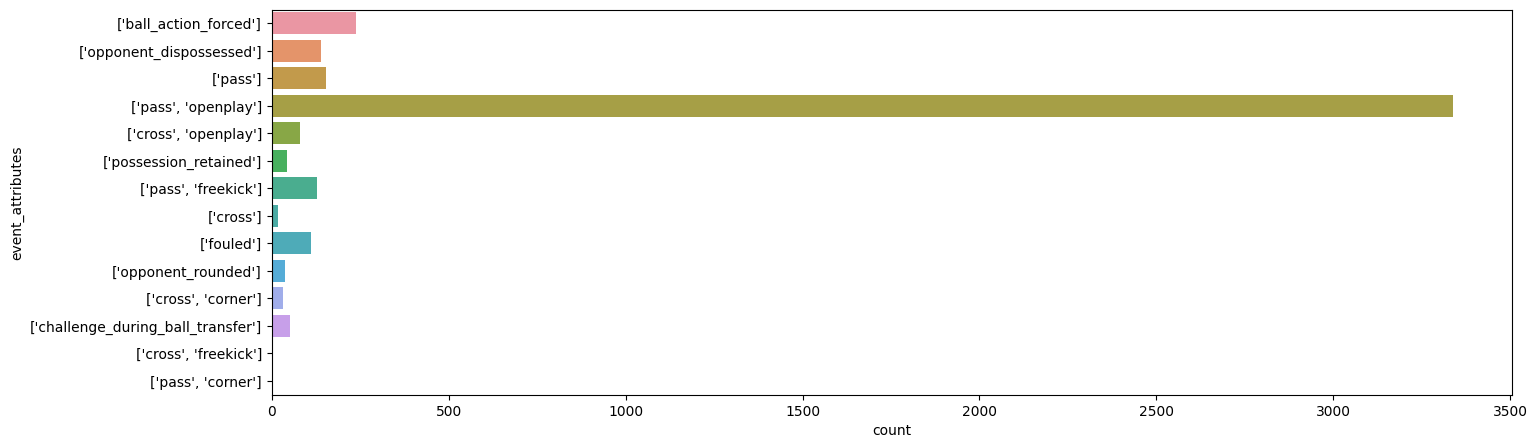

In [8]:
plt.figure(figsize=(16,5))
sns.countplot(y="event_attributes", data=df)

# Throw-Ins

In [9]:
df_throwin = df[df['event'] == 'throwin'].reset_index()
df_throwin

,index,video_id,time,event,event_attributes
0,7,1606b0e6_0,219.230,throwin,['pass']
1,101,1606b0e6_0,427.670,throwin,['pass']
2,119,1606b0e6_0,474.390,throwin,['cross']
3,162,1606b0e6_0,621.110,throwin,['cross']
4,265,1606b0e6_0,875.390,throwin,['pass']
...,...,...,...,...,...
167,10963,ecf251d4_0,2216.147,throwin,['pass']
168,10984,ecf251d4_0,2249.467,throwin,['pass']
169,10996,ecf251d4_0,2311.747,throwin,['pass']
170,11130,ecf251d4_0,2874.827,throwin,['pass']


We see that throwins are separated into passes or crosses => a cross is only a cross if the ball comes from a particular area of the pitch

<AxesSubplot:xlabel='count', ylabel='event_attributes'>

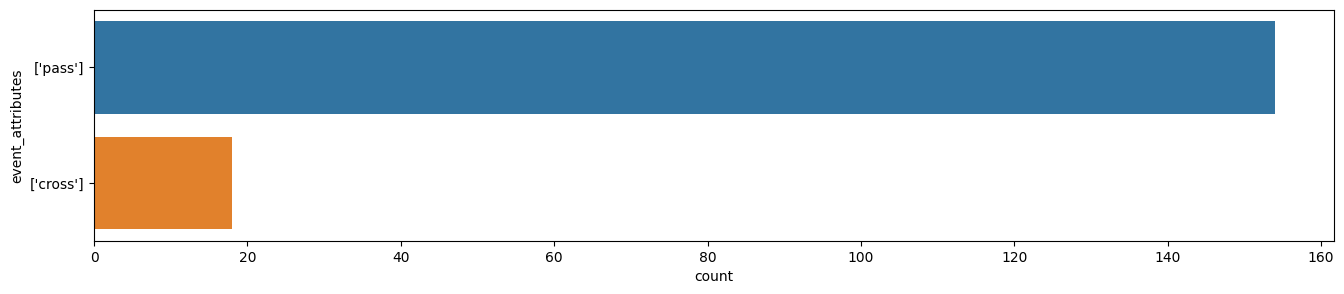

In [10]:
plt.figure(figsize=(16,3))
sns.countplot(y='event_attributes', data=df_throwin)

<AxesSubplot:xlabel='video_id', ylabel='count'>

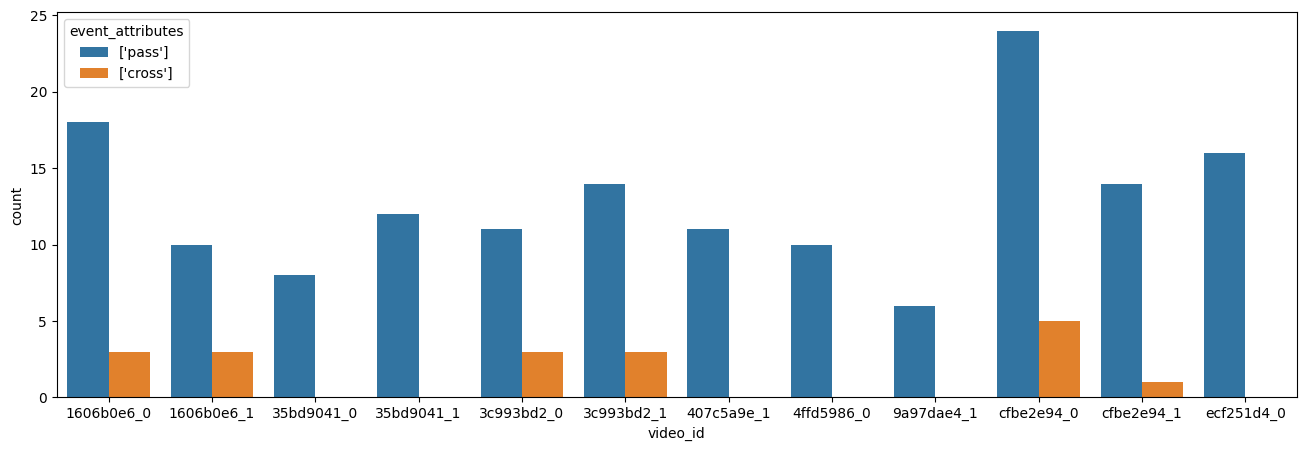

In [11]:
plt.figure(figsize=(16,5))
sns.countplot(x="video_id", hue="event_attributes", data=df_throwin)

In [12]:
def vis_event(row, before=5, after=5):
    print(row["event_attributes"])
    filename = f"test_{row['index']}.mp4"
    ffmpeg_extract_subclip(
        f"../Bundesliga/data/train/{row['video_id']}.mp4", 
        int(row['time']) - before, 
        int(row['time']) + after, 
        targetname=filename,
    )
    
    return Video(filename, width=800)

In [13]:
vis_event(df_throwin.iloc[1]) # pass

['pass']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [14]:
vis_event(df_throwin.iloc[2]) # cross

['cross']
Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


# Plays

In [16]:
df_play = df[df['event'] == 'play'].reset_index()
df_play

,index,video_id,time,event,event_attributes
0,10,1606b0e6_0,224.430,play,"['pass', 'openplay']"
1,13,1606b0e6_0,229.390,play,"['pass', 'openplay']"
2,16,1606b0e6_0,236.710,play,"['pass', 'openplay']"
3,17,1606b0e6_0,239.350,play,"['pass', 'openplay']"
4,20,1606b0e6_0,242.390,play,"['pass', 'openplay']"
...,...,...,...,...,...
3581,11200,ecf251d4_0,3029.707,play,"['pass', 'openplay']"
3582,11203,ecf251d4_0,3032.587,play,"['pass', 'openplay']"
3583,11206,ecf251d4_0,3041.347,play,"['pass', 'openplay']"
3584,11209,ecf251d4_0,3050.347,play,"['pass', 'openplay']"


<AxesSubplot:xlabel='count', ylabel='event_attributes'>

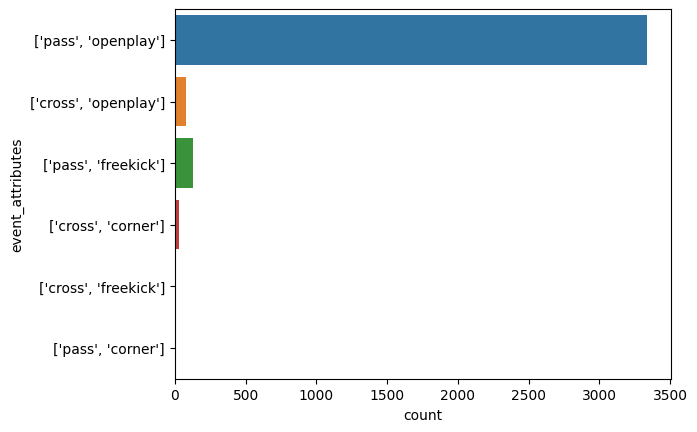

In [17]:
sns.countplot(y='event_attributes', data=df_play)

<AxesSubplot:xlabel='video_id', ylabel='count'>

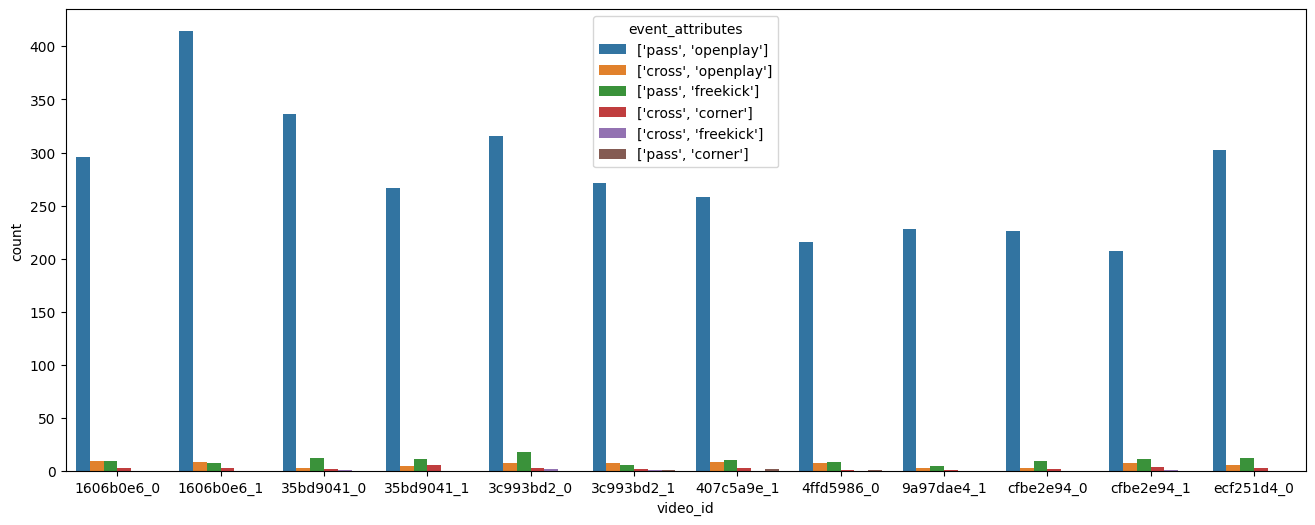

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(x='video_id', hue='event_attributes', data=df_play)
# plt.ylim(0,50)

In [28]:
df_play['event'].value_counts()

play    3586
Name: event, dtype: int64